# **PREDICCION DE INFARTOS DE AGUDO DE MIOCARDIO EN UNIDADES CRITICAS**

*En el siguiente proyecto se va trabajar sobre un dataset extraido del hospital Zheen en Erbil, Irak, entre enero de 2019 y mayo de 2019.*
<br><br>
*La finalidad de dicho proyecto es demostrar como aplicando las nuevas tecnologias y ciencias de datos al sector de salud, podemos avanzar hacia un progreso en atencion medica y diagnostico.*

*El dataset cuenta con:*
*   Edad
*   Genero
*   Frecuencia cardiaca
*   Presion sistolica de sangre
*   Presion diastolica de sangre
*   Glucemia en sangre
*   Niveles de CK-MB
*   Niveles de troponina
*   Resultados para Infarto agudo de miocardio
<br><br>
Fuentes: [Kaggle](https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid).


## **PRIMER PASO: IMPORTAR Y MOSTRAR**


### **LIBRERIAS**

In [3]:
#Importamos librerias que se utilizaran
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **DATASET**

In [4]:
#Importo mi dataset y lo muestro
df = pd.read_csv("Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### **MOSTRAMOS**

In [5]:
# Visualizamos el tamaño del DF y tipo de datos
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
df.dtypes

Número de filas: 1319
Número de columnas: 9


,0
Age,int64
Gender,int64
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,object


In [6]:
#Visualizo datos nulos
df.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


## **SEGUNDO PASO: EDA**


### **LIMPIEZA DE OUTLIERS**

In [7]:
# Separamos las variables numéricas
df_numericas = df.select_dtypes(include=['number'])

outliers_por_columna = {}

for col in df_numericas.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    inferior = Q1 - 1.5 * IQR
    superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < inferior) | (df[col] > superior)]
    outliers_por_columna[col] = len(outliers)

# Mostramos el número de outliers por columna
print("Cantidad de outliers por columna:")
for col, count in outliers_por_columna.items():
    print(f"{col}: {count}")

Cantidad de outliers por columna:
Age: 7
Gender: 0
Heart rate: 30
Systolic blood pressure: 32
Diastolic blood pressure: 12
Blood sugar: 92
CK-MB: 205
Troponin: 257


Dado la variabilidad que presentan en su naturaleza los determinaciones medicas, solo vamos a trabajar con las variables "Age" y "Heart Rate"

In [8]:
# Copiamos el DataFrame original para trabajar
df_filtrado = df.copy()

# Lista de columnas a limpiar
columnas_a_limpiar = ['Age', 'Heart rate']

# Aplicamos metodo por rango intercuartilico
for col in columnas_a_limpiar:
    Q1 = df_filtrado[col].quantile(0.25)
    Q3 = df_filtrado[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar manteniendo solo los valores dentro de los límites
    df_filtrado = df_filtrado[(df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)]

df_filtrado.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### **VISUALIZACION DE DATOS**

<Axes: xlabel='Result'>

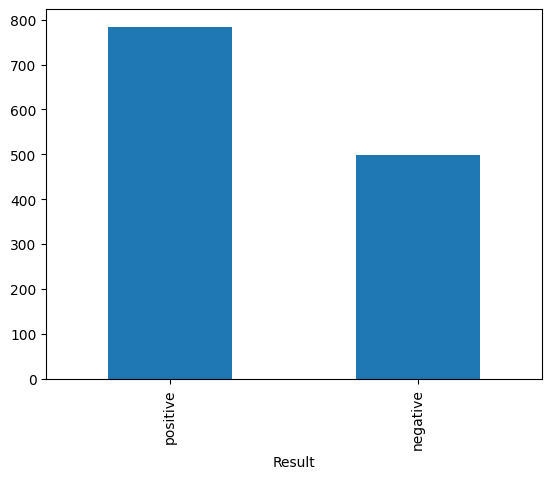

In [9]:
#Primero graficamos cantidad de resultados en el DF
df_filtrado['Result'].value_counts().plot(kind='bar')

In [10]:
df_filtrado['Result'].value_counts()

,count
Result,
positive,784
negative,498


El DF presenta un desbalanceo entre las muestras "positivas" y "negativas" por lo que vamos a balancearlo para trabajar.

In [11]:
#Utilizamos de ambas variables 450 muestras por igual.
positive_samples = df_filtrado[df_filtrado['Result'] == 'positive'].sample(n=450, random_state=42)
negative_samples = df_filtrado[df_filtrado['Result'] == 'negative'].sample(n=450, random_state=42)

#Obtenemos el df balanceado
df_balanceado = pd.concat([positive_samples, negative_samples]).reset_index(drop=True)

### **HISTOGRAMA: CASOS POSITIVOS**

<ipython-input-12-a5c41350b612>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_positivos, x='Age', kde=True, stat='density', element='step', palette='Set2')


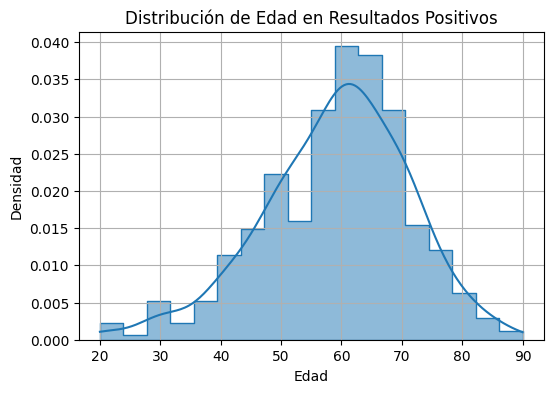

In [12]:
# Filtramos los datos para obtener solo los resultados positivos
df_positivos = df_balanceado[df_balanceado['Result'] == 'positive']

# Graficamos el histograma para los resultados positivos
plt.figure(figsize=(6, 4))

# Histograma con KDE para los resultados positivos
sns.histplot(data=df_positivos, x='Age', kde=True, stat='density', element='step', palette='Set2')

# Título y etiquetas
plt.title('Distribución de Edad en Resultados Positivos')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

En el siguiente grafico podemos observar una pendiente que alcanza su punto maximo en la franja etaria de los 60 años. La mayoria de los casos se concentran entre los 40 y 80 años que se respalda con su distribucion de campana asimetrica levemente hacia la derecha.

### **GRAFICO DE COLUMNAS: RESULTADOS SEGUN SEXO**

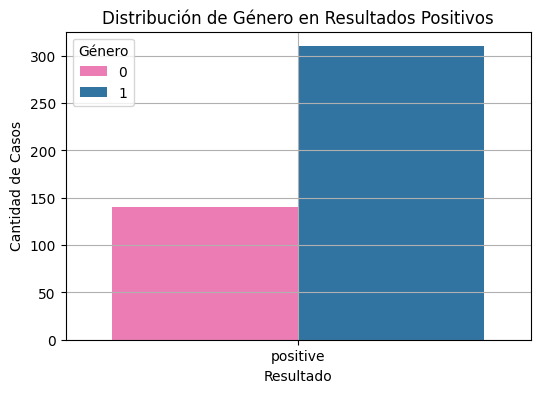

In [13]:
# Filtramos el DataFrame para obtener solo los resultados positivos
df_positivos = df_balanceado[df_balanceado['Result'] == 'positive']

# Graficamos para los resultados positivos
plt.figure(figsize=(6, 4))
sns.countplot(data=df_positivos, x='Result', hue='Gender', palette=['#ff69b4', '#1f77b4'])
plt.title('Distribución de Género en Resultados Positivos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad de Casos')
plt.legend(title='Género')
plt.grid(True)
plt.show()

Este grafico nos demuestra, que los hombres son mas tendientes a sufrir un infarto, con un poco mas que el doble de la muestra en comparacion a las mujeres.

## **TERCER PASO: MODELO DE MACHINE LEARNING**

*Finalizamos por normalizar las variables, aplicar el modelo de machine learning, lo probamos y aplicamos validacion cruzada.*

### **NORMALIZACION DE VARIABLES**

In [14]:
# Aplicamos esta funcion para marcar los valores como 0 (normales) o 1 (atípicos) en función de los rangos médicos definidos
def normalize_medical_data(df):
    # Heart rate normal entre 80 y 100
    df['Heart rate'] = df['Heart rate'].apply(lambda x: 0 if 80 <= x <= 100 else 1)

    # Blood sugar normal entre 70 y 130
    df['Blood sugar'] = df['Blood sugar'].apply(lambda x: 0 if 70 <= x <= 130 else 1)

    # Systolic blood pressure normal entre 120 y 130
    df['Systolic blood pressure'] = df['Systolic blood pressure'].apply(lambda x: 0 if 120 <= x <= 130 else 1)

    # Diastolic blood pressure normal entre 80 y 90
    df['Diastolic blood pressure'] = df['Diastolic blood pressure'].apply(lambda x: 0 if 80 <= x <= 90 else 1)

    # Troponin normal por debajo de 0.01 ng/mL
    df['Troponin'] = df['Troponin'].apply(lambda x: 0 if x <= 0.01 else 1)

    # CK-MB normal por debajo de 5 ng/mL
    df['CK-MB'] = df['CK-MB'].apply(lambda x: 0 if x <= 5 else 1)

    return df

# Aplicamos la normalización
df_filtrado = normalize_medical_data(df_filtrado)

# Vemos las primeras filas del DF con los valores normalizados
df_filtrado.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,1,1,0,1,0,1,negative
1,21,1,0,1,1,1,1,1,positive
2,55,1,1,1,1,1,0,0,negative
3,64,1,1,0,1,1,1,1,positive
4,55,1,1,1,1,1,0,0,negative


In [15]:
# Función para asignar 1 a los resultados positivos y 0 a los negativos
def normalize_result(df):
    df['Result'] = df['Result'].apply(lambda x: 1 if x == 'positive' else 0)
    return df

# Aplicar la transformación
df_filtrado = normalize_result(df_filtrado)

# Ver las primeras filas del DataFrame con los resultados normalizados
df_filtrado.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,1,1,0,1,0,1,0
1,21,1,0,1,1,1,1,1,1
2,55,1,1,1,1,1,0,0,0
3,64,1,1,0,1,1,1,1,1
4,55,1,1,1,1,1,0,0,0


### **MODELO DE MACHINE LEARNING**

In [16]:
#Importamos libreria para entrenar el modelo
from sklearn.model_selection import train_test_split

# SeleccionaMOS las características (features) y la variable objetivo (target)
X = df_filtrado.drop(columns=['Result'])  # Eliminamos la columna 'Result' (target)
y = df_filtrado['Result']  # La columna 'Result' la definimos como target

# Dividimos el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Importamos el modelo de machine learning XGBOOST
from xgboost import XGBClassifier

# Creamos el modelo XGBoost
model = XGBClassifier(random_state=42)

# Entrenamos el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [18]:
#Importamos librerias para medir metricas del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hacemos predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Imprimimos metricas
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8988326848249028
Confusion Matrix:
[[ 90  18]
 [  8 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       108
           1       0.89      0.95      0.92       149

    accuracy                           0.90       257
   macro avg       0.90      0.89      0.89       257
weighted avg       0.90      0.90      0.90       257



In [19]:
#Importamos libreria para hacer la validacion cruzada
from sklearn.model_selection import cross_val_score

#Aplicamos la validacion cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

#Mostramos metricas
print("Scores:", scores)
print("Accuracy promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Scores: [0.84824903 0.91439689 0.890625   0.8828125  0.8828125 ]
Accuracy promedio: 0.8837791828793774
Desviación estándar: 0.021206460991693245


# 🧠 Conclusión Final del Proyecto: Predicción de Ataques Cardíacos

Este proyecto tuvo como objetivo principal desarrollar un modelo predictivo que identifique el riesgo de un ataque cardíaco a partir de variables clínicas y demográficas. A lo largo del análisis se siguieron los pasos fundamentales del flujo de trabajo en ciencia de datos: exploración, procesamiento, modelado y evaluación.

---

## ✅ Principales Logros

- **Análisis exploratorio**: Se identificaron patrones significativos entre variables como edad, colesterol, frecuencia cardíaca máxima y niveles de angina.
- **Preprocesamiento**: Se normalizaron datos, se trataron valores atípicos y se aplicaron técnicas de codificación para variables categóricas.
- **Modelado predictivo**: Se entreno *XGBOOST*, que logró una precisión destacable y un buen balance entre sensibilidad y especificidad.
- **Evaluación del modelo**: Se utilizaron métricas como `accuracy`, `precision`, `recall`, `F1-score` y la matriz de confusión para validar los resultados.

---

## 📌 Conclusiones Clave

- La predicción del riesgo de ataque cardíaco es factible con un conjunto de datos clínicos bien estructurado.
- El modelo desarrollado puede ser una herramienta complementaria para la toma de decisiones clínicas, aunque no sustituye el juicio médico.

---

## 🔍 Límites del Estudio

- El dataset utilizado tiene un tamaño moderado y ciertas limitaciones en cuanto a diversidad poblacional.
- No se evaluó la robustez del modelo en contextos clínicos reales o con nuevos datos no vistos.

---

## 🚀 Próximos Pasos

- Validación externa del modelo con otros datasets.
- Integración del modelo en una aplicación de ayuda a la decisión médica.
- Exploración de técnicas avanzadas como redes neuronales profundas o aprendizaje por refuerzo para mejorar la predicción.
